In [2]:
import numpy as np
import pandas as pd

from data_processing import process_data

## LOAD DATA

In [3]:
df2015 = process_data(2015)
df2016 = process_data(2016)
df2017 = process_data(2017)
df2018 = process_data(2018)

for df in [df2015, df2016, df2017, df2018]:
    df["mfatals"]  = df["fatals"].apply(lambda x: 1 if x > 1 else 0)

df2018

,state,case,date,lon,lat,vehicles,pedestrians,persons,fatals,drunk_dr,weather,reckless,impaired,speeding,mfatals
0,AL,10001,2018-01-05 06:00:00,-86.1319,33.591331,2,0,1,1,0,0,0,0,0,0
1,AL,10002,2018-01-08 00:48:00,-87.2898,33.809186,1,0,2,2,0,1,0,0,0,1
2,AL,10003,2018-01-08 22:50:00,-86.5640,32.767736,2,0,2,1,0,0,0,0,0,0
3,AL,10004,2018-01-09 13:02:00,-87.6432,31.027806,1,0,2,1,0,0,0,0,0,0
4,AL,10005,2018-01-19 07:09:00,-86.9938,33.332103,2,0,2,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33649,WY,560097,2018-10-28 02:49:00,-108.4710,43.052042,1,0,1,1,1,0,0,0,0,0
33650,WY,560098,2018-12-26 10:45:00,-104.4080,42.866639,2,0,2,1,0,0,0,0,0,0
33651,WY,560099,2018-12-11 18:45:00,-105.7610,41.358856,1,0,1,1,0,1,0,0,0,0
33652,WY,560100,2018-10-22 13:34:00,-108.4550,42.983244,1,0,2,1,1,0,0,0,0,0


In [21]:
pd.concat([df2015, df2016, df2017, df2018])["fatals"].value_counts(normalize=True)

1     0.929306
2     0.058664
3     0.008900
4     0.002280
5     0.000613
6     0.000170
8     0.000030
13    0.000015
20    0.000007
10    0.000007
9     0.000007
Name: fatals, dtype: float64

In [3]:
df_train = pd.concat([df2015, df2016, df2017]).reset_index(drop=True)
df_test  = df2018

df_train

,state,case,date,lon,lat,vehicles,pedestrians,persons,fatals,drunk_dr,weather,reckless,impaired,speeding,mfatals
0,AL,10001,2015-01-01 02:40:00,-87.3253,33.878653,1,0,1,1,1,0,0,0,0,0
1,AL,10002,2015-01-01 22:13:00,-86.9087,34.910442,1,0,1,1,0,0,0,0,0,0
2,AL,10003,2015-01-01 01:25:00,-85.7585,32.142006,1,0,2,1,1,0,0,0,0,0
3,AL,10004,2015-01-04 00:57:00,-85.5103,31.439814,1,0,1,1,1,0,0,0,0,0
4,AL,10005,2015-01-07 07:09:00,-85.5151,31.319331,2,0,2,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101841,WY,560101,2017-11-30 06:07:00,-104.8520,41.295736,1,0,1,1,0,0,0,0,0,0
101842,WY,560102,2017-12-05 23:00:00,-104.4770,42.195700,1,0,1,1,1,0,0,0,0,0
101843,WY,560103,2017-12-12 17:27:00,-104.7900,41.138431,1,2,1,1,0,0,0,0,0,0
101844,WY,560104,2017-12-28 08:45:00,-106.2800,42.838933,1,0,1,1,0,0,0,0,0,0


## RANDOM FORESTS (baseline model)

In [4]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    class_weight="balanced"
)

xcols = ["lon", "lat", "pedestrians", "drunk_dr", "weather", "reckless", "impaired", "speeding"]
ycols = "mfatals"

x_train = df_train[xcols]
y_train = df_train[ycols]

x_test  = df_test[xcols]
y_test  = df_test[ycols]

clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [5]:
feature_importances = pd.DataFrame(
    clf.feature_importances_,
    index = xcols,
    columns=["Feature Importance"]
).sort_values("Feature Importance", ascending=False)

feature_importances

,Feature Importance
pedestrians,0.628093
lon,0.141209
lat,0.127193
drunk_dr,0.063763
reckless,0.011554
impaired,0.011341
weather,0.010210
speeding,0.006637


In [6]:
clf.score(x_train, y_train), clf.score(x_test,  y_test)

(0.4323782966439526, 0.43795685505437687)

In [7]:
df_train["mfatals"].value_counts(normalize=True, dropna=False)

0    0.929364
1    0.070636
Name: mfatals, dtype: float64

In [9]:
## confusion matrix

from sklearn.metrics import confusion_matrix

y_pred = clf.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[12848, 18421],
       [  494,  1891]])

## RANDOM FORESTS (optimized model)

In [14]:
from sklearn.model_selection import GridSearchCV

n_estimators = [80, 100, 120]
criterion = ["gini", "entropy"]
max_depth = [5, 10, None]
# max_features = ["auto", None]
oob_score = [True, False]
class_weight = ["balanced", "balanced_subsample"]

param_grid = {
    "n_estimators": n_estimators,
    "criterion":    criterion,
    "max_depth":    max_depth,
#     "max_features": max_features,
    "oob_score":    oob_score,
    "class_weight": class_weight,
}

clf = RandomForestClassifier()

clf_optim = GridSearchCV(
    estimator = clf,
    param_grid = param_grid,
    n_jobs = -1,
    iid = False,
    cv = 3
)

clf_optim.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [15]:
clf_optim.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': None,
 'n_estimators': 80,
 'oob_score': False}

In [16]:
clf_optim.score(x_train, y_train), clf_optim.score(x_test,  y_test)

(0.9967009013608782, 0.9165626671420931)

In [17]:
## confusion matrix

y_pred = clf_optim.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[30771,   498],
       [ 2310,    75]])

## Various Classifiers

KNeighborsClassifier
****Results****
Accuracy: 91.6325%
Log Loss: 1.9334975843900293


/home/sorin/myApps/miniconda-4.7.12/envs/pycpu/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier
****Results****
Accuracy: 91.9623%
Log Loss: 1.5119801958112067
AdaBoostClassifier
****Results****
Accuracy: 92.9280%
Log Loss: 0.6663528771677875
GradientBoostingClassifier
****Results****
Accuracy: 92.9191%
Log Loss: 0.23971461594474863
GaussianNB
****Results****
Accuracy: 89.9031%
Log Loss: 0.30309619394536047
LinearDiscriminantAnalysis
****Results****
Accuracy: 92.9132%
Log Loss: 0.2525190575841044


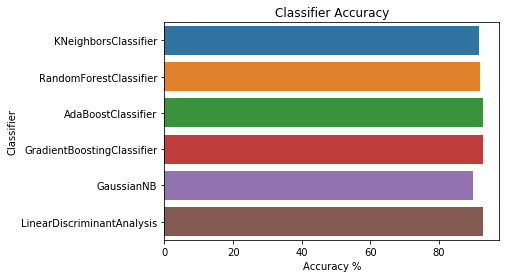

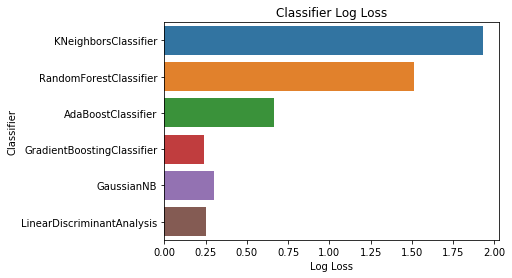

In [11]:
train_f = x_train
test_f  = x_test
train_l = y_train
test_l  = y_test

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
   KNeighborsClassifier(3),
#    SVC(kernel="rbf", C=0.025, probability=True),
#    NuSVC(probability=True),
#    DecisionTreeClassifier(),
   RandomForestClassifier(),
   AdaBoostClassifier(),
   GradientBoostingClassifier(),
   GaussianNB(),
   LinearDiscriminantAnalysis()]

log_cols=["Classifier", "Accuracy", "Log Loss"]

log = pd.DataFrame(columns=log_cols)
for clf in classifiers:
    clf.fit(train_f, train_l)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    print('****Results****')
    train_predictions = clf.predict(test_f)
    acc = accuracy_score(test_l, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    train_predictions = clf.predict_proba(test_f)
    ll = log_loss(test_l, train_predictions)
    print("Log Loss: {}".format(ll))
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    print("="*30)#sns.set_color_codes("muted")

sns.barplot(x='Accuracy', y='Classifier', data=log)
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()#sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log)
plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()